# Module 1 Discussion - Supporting Code

#### Steve Desilets
#### June 20, 2023

### Question 1

#### Question

I am setting up a healthcare clinic and need to determine FTE staffing requirements for the providers.
I can take fractional FTEs. I will be choosing from primary care physicians (MDs) who have an average salary of 150,000 dollars,
nurse practitioners (NPs) who have an average salary of 110,000 dollars,
and physician assistants PAs) who have an average salary of 100,000 dollars. 

1.	I need at least 10 providers to meet demand. 
2.	I need at least 1.5 NP for each PA.
3.	Physicians can only supervise 2 non-physicians (NPs and PAs). 

Formulate the linear program to meet these requirements.  Because the constraint matrix is square, this problem may be
solved by inverting the constraint matrix (if invertible) and multiplying it by the right-hand side parameters.  
See if you can do it.  Otherwise, solve the problem by using LPSolve, R, GAMS, or Python.  
Provide the objective as well as all the decision variable values. 


#### Solution

In [12]:
# Let's solve this problem using the simplex method

# Import necessary methods and functions
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# Create linear programming variables
m = LpVariable("m", 0, None) # Bl >= 0 & no upper ; primary care physicians (MDs)
n = LpVariable("n", 0, None) # r >= 0 & no upper ; nurse practitioners (NPs)
a = LpVariable("a", 0, None) # Be >= 0 & no upper ; physician assistants (PAs)

# Create the problem variable
prob = LpProblem("problem", LpMinimize)

# Define the constraints - remember that the lower bounds are defined in LpVariable above
prob += m + n + a >= 10
prob += n >= 1.5*a
prob += 2*m >= n + a


# Define the objective function to minimize
prob+= (150000 * m ) + (110000 * n) + (100000 * a)

# Solve the problem
status = prob.solve()
LpStatus[status]

# Print the solution
minimum_cost = 150000*value(m) + 110000*value(n) + 100000 * value(a)
primary_care_physicians = value(m)
nurse_practitioners = value(n)
physician_assistants = value(a)

print(f"The minimum cost is ${minimum_cost:.2f} and occurs when {primary_care_physicians:.2f} primary care physicians {nurse_practitioners:.2f} nurse practitioners, and {physician_assistants:.2f}  physician assistants are hired.")



The minimum cost is $1206666.67 and occurs when 3.33 primary care physicians 4.00 nurse practitioners, and 2.67  physician assistants are hired.


### Onboarding Problem Supporting Code

### Question 2

#### Question

   Recently, I worked as a US government contractor to redesign the onboarding process for a federal government agency and to release a new IT Onboarding Tool to enable the redesigned onboarding process.  During my tenure in this position, onboarding employees to the agency was one of the highest priorities for the agency’s human resources office – the Office of Human Capital and Talent Management (HCTM).  For this week’s discussion post, I’m going to describe an analysis about how this federal agency could think about how to most efficiently allocate its budget and staff to maximize the efficiency of the onboarding process (though I will use hypothetical numbers). Since the problem includes constraint equations that define a feasible region, as well as an objective function to be maximized, I’ll approach this problem as an optimization problem.
 
   For this example problem, we’ll want to maximize the number of individuals who onboard to the agency per year using constraint equations for the number of agency staff supporting the onboarding process.  We’ll put ourselves in the position of agency leadership focused on allocating funding across the two teams most heavily involved in the agency’s onboarding process: 1) the Office of Security’s (SEC’s) Onboarding Team (which conducts security clearance investigations) and 2) HCTM’s Task Team (which handles the human resources onboarding processes, such as issuing offer letters, processing benefits, and adding new hires to the payroll).  The equation that we will maximize (below) assumes that onboarding one person to the agency requires 60 hours of SEC staff attention, 45 hours of HCTM staff attention, and that agency staff work 1872 hours per year.  (The latter assumption is derived from staff working 40 hours per week for 52 weeks per year with a 90% utilization rate).
    
Maximization Equation

	N = (1872/60) * s + (1872/45) * h
    
Where

	N = the number of staff onboarded to the agency per year
	s = the number of full time equivalent (FTE) staff on the SEC onboarding team
	h = the number of FTEs on the HCTM Task Team
	
   We’ll also define some constraint equations that will place limits on how resources can be distributed across SEC and HCTM.  First, there must be at least 1 FTE on each team.  Second, we’ll say that the agency has an annual budget of 1,350,000 dollars to distribute across the two onboarding team and that each HCTM Task Team member’s annual fully burdened rate (FBR) of 75,000 dollars and that each SEC Team member’s annual FBR is 90,000 dollars.  Last, we’ll set up another constraint to make sure that the staffing allocation across the two teams remains reasonably balanced. Given that our best estimate for the ratio of onboarding touch times between HCTM and SEC staff is 45:60 (or 3:4), we’ll set a constraint such that the ratio of HCTM to SEC FTEs is between 0.5 and 1.

Constraint Equations
    
    s ≥ 1
    h ≥ 1
    90,000 * s + 75,000 *h ≤ 1,350,000
    (1/2) ≤ (h / s) ≤ 1




#### Answer

   Now that we’ve defined our maximization equation and constraint equations, we plug the gathered information into Python to graph and find our feasible region.  Then, in Python, we test each corner of our feasible region to find which corner corresponds to the maximum value for our maximization equation.  After testing each corner, we find that the optimal allocation of resources is to allocate 8.2 FTEs to the HCTM Task Team and 8.2 FTEs to the SEC onboarding team, which will enable the agency to onboard 596 people per year.  


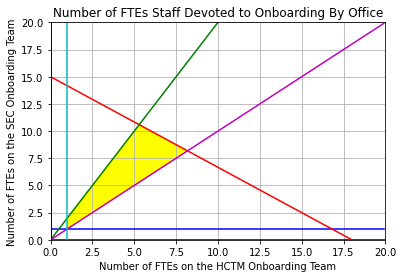

The number of staff onboarded to the agency per year with 1.0 FTEs on the HR Office's Onboarding Team and 1.0 FTEs on the Security Office's Onboarding Team is 73 people.
The number of staff onboarded to the agency per year with 1.0 FTEs on the HR Office's Onboarding Team and 2.0 FTEs on the Security Office's Onboarding Team is 104 people.
The number of staff onboarded to the agency per year with 5.3 FTEs on the HR Office's Onboarding Team and 10.6 FTEs on the Security Office's Onboarding Team is 551 people.
The number of staff onboarded to the agency per year with 8.2 FTEs on the HR Office's Onboarding Team and 8.2 FTEs on the Security Office's Onboarding Team is 596 people.


In [13]:
# In this code, we will maximize the number of individuals onboarding the a government agency per year given 
# certain constraints.

# First, we will import the libraries that we will need for this exercise and initialize the graphical figure
# that we will use to solve our linear programming problem
import matplotlib.pyplot
import numpy
matplotlib.pyplot.figure()

# Second, we will define the constraint equations that will appear in our graph
h = numpy.arange(0, 20, 0.1)
s1 = 0*h + 1                      # There must be at least one FTE on the Security Office's Onboarding Team
s2 = (-5/6)*h + 15                # This is the constraint on the number of employees based on agency budget
s3 = 2*h                          # This constrains the staffing model so that the there are at the Security Office's 
                                  # Onboarding Team has no more than twice as many people as the HR Office's Onboarding Team
s4 = h                            # this constrains the staffing model so there are more individuals on the Security 
                                  # Office's Onboarding Team than there are on the HR Office's Onboarding Team

# Next, we will define parameters in the graph such as axis limits, grid lines, and axis labels
matplotlib.pyplot.xlim(0, 20)
matplotlib.pyplot.ylim(0, 20)
matplotlib.pyplot.hlines(0, 0, 20, color = 'k')
matplotlib.pyplot.vlines(0, 0, 20, color = 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.xlabel("Number of FTEs on the HCTM Onboarding Team")
matplotlib.pyplot.ylabel("Number of FTEs on the SEC Onboarding Team")
matplotlib.pyplot.title('Number of FTEs Staff Devoted to Onboarding By Office')

# Next, we plot the lines that determine our feasible region
matplotlib.pyplot.plot(h, s1, color = 'b')
matplotlib.pyplot.plot(h, s2, color = 'r')
matplotlib.pyplot.plot(h, s3, color = 'g')
matplotlib.pyplot.plot(h, s4, color = 'm')
matplotlib.pyplot.axvline(1, color = 'c') # This is the additional constraint that says there must be at least one FTE on 
                                          # the HR Office's Onboarding Team

# Now we must solve for the corners of the feasible region

# Bottom Left Corner
a1 = numpy.array([[1,0], [0,1]])
b1 = numpy.array([1,1])
c1 = numpy.linalg.solve(a1,b1)

# Top left Corner
a2 = numpy.array([[1,0], [-2,1]])
b2 = numpy.array([1,0])
c2 = numpy.linalg.solve(a2, b2)

# Top Right Corner
a3 = numpy.array([[-2,1], [5/6,1]])
b3 = numpy.array([0,15])
c3 = numpy.linalg.solve(a3, b3)

# Bottom Right Corner
a4 = numpy.array([[5/6,1], [-1,1]])
b4 = numpy.array([15,0])
c4 = numpy.linalg.solve(a4, b4)


# Next, we use the identified feasible region corners to plot the shaded feasible region on the graph
h = [c1[0], c2[0], c3[0], c4[0]]
s = [c1[1], c2[1], c3[1], c4[1]]
matplotlib.pyplot.fill(h,s,color = "yellow")

# We ask Python to plot the requested graph
matplotlib.pyplot.show()

# Last, we use the identified corners of the feasible region to determine which staffing model maximizes our function
# for the number of people onboarded to the agency in a year

def onboarding_calculator(h,s):
    onboarded_individuals = (1872 / 45) * h + (1872 / 60) * s
    print(f"The number of staff onboarded to the agency per year with {h:.1f} FTEs on the HR Office's Onboarding Team and {s:.1f} FTEs on the Security Office's Onboarding Team is {onboarded_individuals:.0f} people.")

onboarding_calculator(c1[0], c1[1])
onboarding_calculator(c2[0], c2[1])
onboarding_calculator(c3[0], c3[1])
onboarding_calculator(c4[0], c4[1])




